# Import Liabraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data Set

In [ ]:
df = pd.read_csv("/content/cleaned_netflix_data (4).csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Available,United States,2021-09-25,2020.0,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021.0,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021.0,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Not Available,Unknown,2021-09-24,2021.0,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021.0,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Dataset Overview

In [ ]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8088 entries, 0 to 8087
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       8088 non-null   object 
 1   type          8088 non-null   object 
 2   title         8088 non-null   object 
 3   director      8088 non-null   object 
 4   cast          8088 non-null   object 
 5   country       8088 non-null   object 
 6   date_added    8088 non-null   object 
 7   release_year  8088 non-null   float64
 8   rating        8088 non-null   object 
 9   duration      8088 non-null   object 
 10  listed_in     8088 non-null   object 
 11  description   8088 non-null   object 
dtypes: float64(1), object(11)
memory usage: 758.4+ KB


,release_year
count,8088.000000
mean,2016.305514
std,3.786044
min,2004.000000
25%,2015.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


# Missing Value

In [ ]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


# Univariate Analysis (Numeric Features)




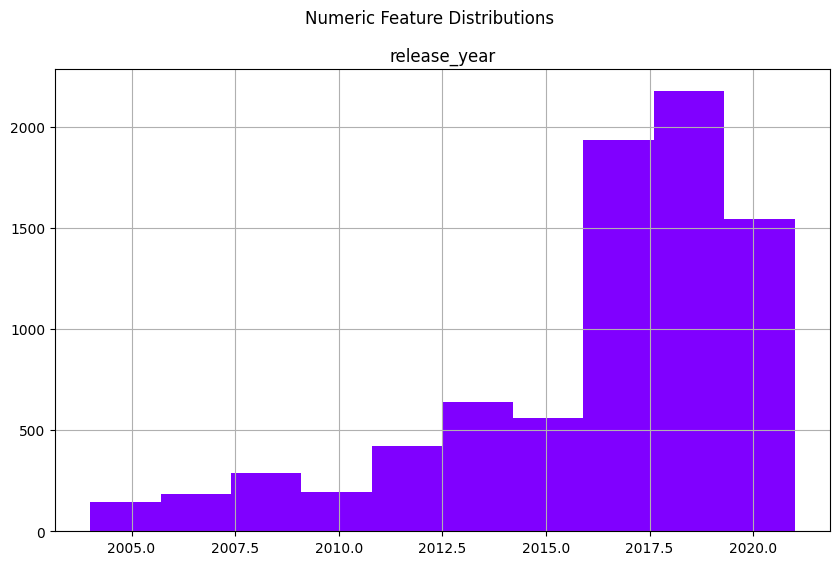

In [ ]:
df_num = df.select_dtypes(include=['int64','float64'])
df_num.hist(figsize=(10,6), color=plt.cm.rainbow(np.linspace(0, 1, len(df_num.columns))))
plt.suptitle("Numeric Feature Distributions")
plt.show()

# Univariate Analysis (Categorical features)

In [ ]:
df['type'].value_counts()

,count
type,
Movie,5487
TV Show,2601


In [ ]:
df['rating'].value_counts()

,count
rating,
TV-MA,3129
TV-14,1986
TV-PG,797
R,638
PG-13,379
TV-Y7,318
TV-Y,304
PG,222
TV-G,207


**Graph**

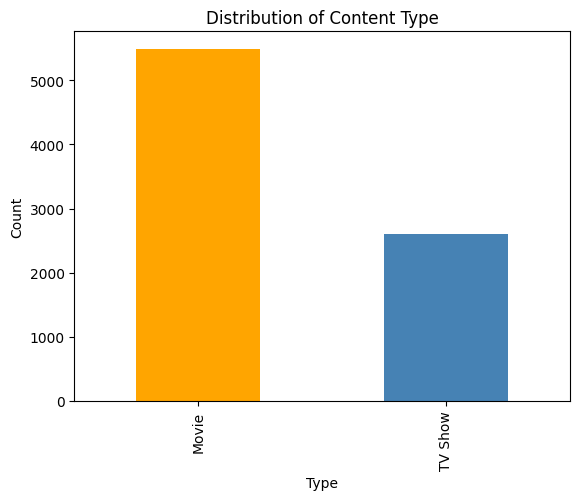

In [ ]:
df['type'].value_counts().plot(
    kind='bar',
    color=['orange','steelblue']
)
plt.title('Distribution of Content Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

# Caregorical Understanding

# Bivariate Analysis

In [ ]:
pivot = pd.crosstab(df['type'], df['rating'])
pivot

rating,66 min,74 min,84 min,G,NC-17,NR,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,UR
type,,,,,,,,,,,,,,,,,
Movie,1,1,1,21,3,68,222,379,636,1278,122,1990,490,130,138,5,2
TV Show,0,0,0,0,0,5,0,0,2,708,85,1139,307,174,180,1,0


**Graph**

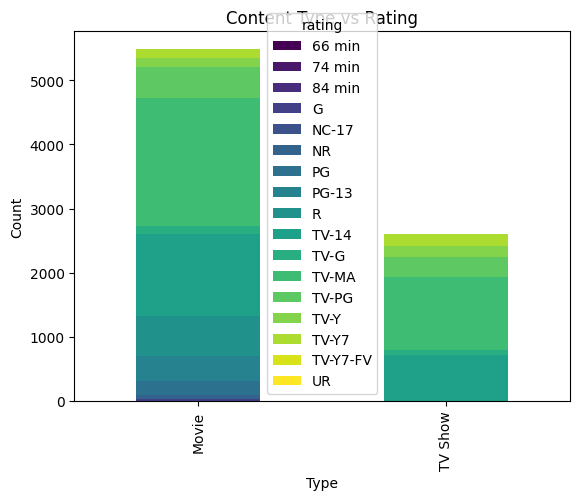

In [ ]:
pivot.plot(
    kind='bar',
    stacked=True,
    colormap='viridis'
)
plt.title('Content Type vs Rating')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

# Trivariate Analysis

In [ ]:
pd.crosstab(
    [df['type'], df['country']],
    df['rating']
)

rating                                                      66 min  74 min  \
type    country                                                              
Movie   , France, Algeria                                        0       0   
        Argentina                                                0       0   
        Argentina, Brazil, France, Poland, Germany, Den...       0       0   
        Argentina, Chile                                         0       0   
        Argentina, Chile, Peru                                   0       0   
...                                                            ...     ...   
TV Show United States, Sweden                                    0       0   
        United States, United Kingdom                            0       0   
        United States, United Kingdom, Australia                 0       0   
        Unknown                                                  0       0   
        Uruguay, Germany                                         0       0   

rating                                                      84 min  G  NC-17  \
type    country                                                                
Movie   , France, Algeria                                        0  0      0   
        Argentina                                                0  0      0   
        Argentina, Brazil, France, Poland, Germany, Den...       0  0      0   
        Argentina, Chile                                         0  0      0   
        Argentina, Chile, Peru                                   0  0      0   
...                                                            ... ..    ...   
TV Show United States, Sweden                                    0  0      0   
        United States, United Kingdom                            0  0      0   
        United States, United Kingdom, Australia                 0  0      0   
        Unknown                                                  0  0      0   
        Uruguay, Germany                                         0  0      0   

rating                                                      NR  PG  PG-13  R  \
type    country                                                                
Movie   , France, Algeria                                    0   0      0  0   
        Argentina                                            1   0      0  1   
        Argentina, Brazil, France, Poland, Germany, Den...   0   0      0  0   
        Argentina, Chile                                     0   0      0  0   
        Argentina, Chile, Peru                               0   0      0  0   
...                                                         ..  ..    ... ..   
TV Show United States, Sweden                                0   0      0  0   
        United States, United Kingdom                        0   0      0  0   
        United States, United Kingdom, Australia             0   0      0  0   
        Unknown                                              0   0      0  1   
        Uruguay, Germany                                     0   0      0  0   

rating                                                      TV-14  TV-G  \
type    country                                                           
Movie   , France, Algeria                                       1     0   
        Argentina                                               5     2   
        Argentina, Brazil, France, Poland, Germany, Den...      1     0   
        Argentina, Chile                                        1     0   
        Argentina, Chile, Peru                                  0     0   
...                                                           ...   ...   
TV Show United States, Sweden                                   0     0   
        United States, United Kingdom                           1     0   
        United States, United Kingdom, Australia                0     0   
        Unknown                                               108    11   
   

# Correlation Analysis

In [ ]:
num = df.select_dtypes(include=['int64','float64'])
num.corr()

,release_year
release_year,1.0


# Correlation Heatmap

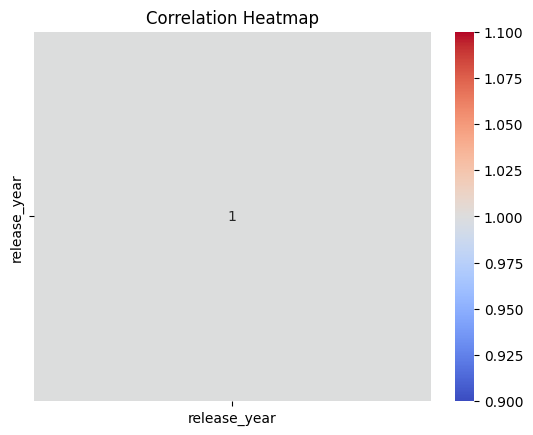

In [ ]:
sns.heatmap(
    num.corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
df['duration_num'] = (
    df['duration']
    .str.extract('(\d+)')
    .astype(float)
)

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-741791779.py:3: SyntaxWarning: invalid escape sequence '\d'
  .str.extract('(\d+)')


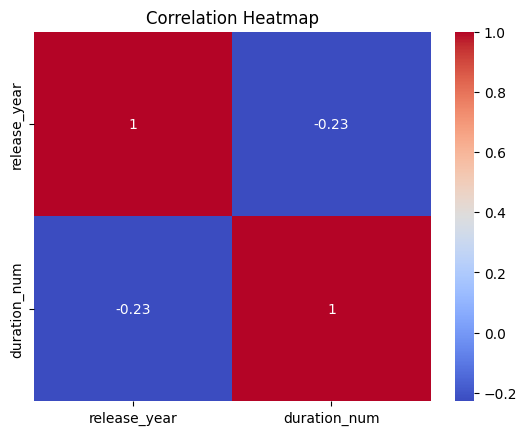

In [ ]:
num = df[['release_year', 'duration_num']]

sns.heatmap(
    num.corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title('Correlation Heatmap')
plt.show()